# Exercise 02: Hyperparameter Tuning Part 2: Manual Tuning

**Make sure you have completed Exercise 01 before attempting this exercise!**

In this exercise, you will learn how to manually evaluate hyperparameter settings.

Let's take care of packages and modules:

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

The following code generates some data samples for analysis.
You don't need to know how it works.

In [3]:
np.random.seed(3)
X_samples = np.sort(np.random.rand(30))
y_samples = -(np.random.randn(30)/10.0 + np.sin(3.0 * np.pi/2 * X_samples + np.pi/2))

Let's plot the samples to get a feel for the data:

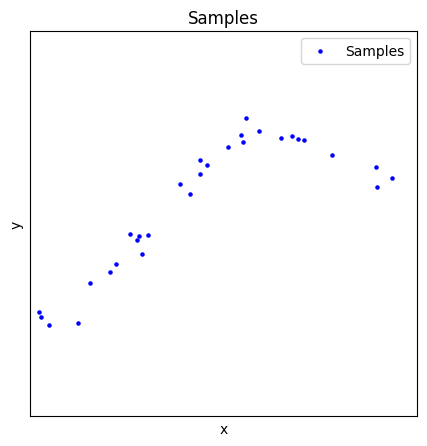

In [4]:
plt.figure(figsize=(5, 5))
plt.setp(plt.gca(), xticks=(), yticks=())
plt.scatter(X_samples[:,np.newaxis], y_samples, color="b", s=5, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Samples")
plt.show()

The following code fits polynomials of various degrees to the samples above and plots the results:

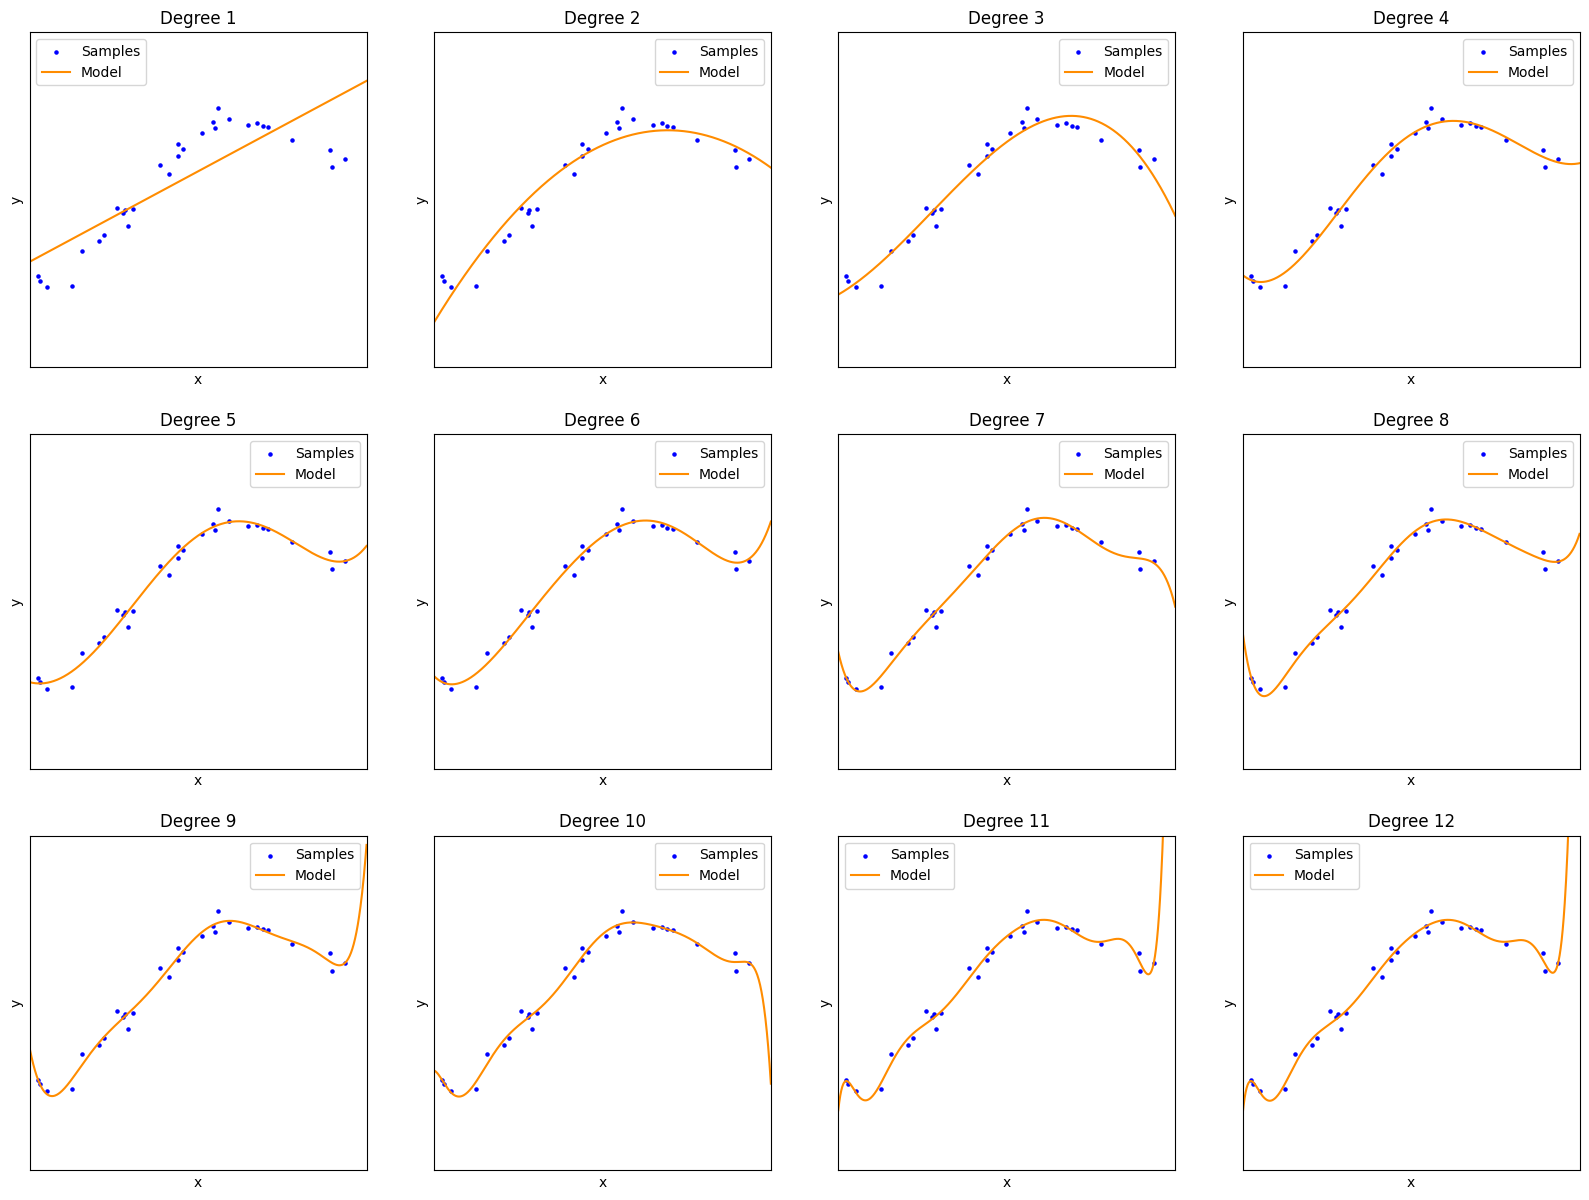

In [5]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

N_cols = 4
N_rows = 1+(len(degrees)//N_cols)

plt.figure(figsize=(5*N_cols, 5*N_rows))

for i in range(len(degrees)):
    ax = plt.subplot(N_rows, N_cols, i+1)
    plt.setp(ax, xticks=(), yticks=())

    pipeline = Pipeline([
        ("poly",   PolynomialFeatures(degree=degrees[i], include_bias=False)),
        ("linreg", LinearRegression()),
    ])
    pipeline.fit(X_samples[:, np.newaxis], y_samples)

    xs = np.linspace(0, 1, 1000)
    plt.scatter(X_samples, y_samples, color="b", s=5, label="Samples")
    plt.plot(xs, pipeline.predict(xs[:, np.newaxis]), color='darkorange', label="Model")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}".format(degrees[i]))

plt.show()

**Which polynomial degree do you think best fits the data?  Why?**

I belive polynomial degree 4 and polynomial degree 5 best fits the data because it takes the shape of the sample data.

The following code fits a degree-50 polynomial to the data points:

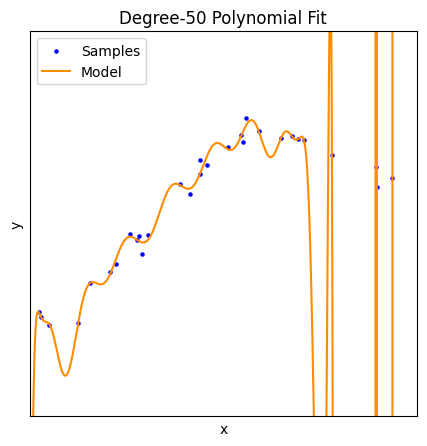

In [6]:
pipeline = Pipeline([
    ("poly",   PolynomialFeatures(degree=50, include_bias=False)),
    ("linreg", LinearRegression()),
])
pipeline.fit(X_samples[:, np.newaxis], y_samples)

plt.figure(figsize=(5, 5))
plt.setp(plt.gca(), xticks=(), yticks=())
xs = np.linspace(0, 1, 10000)
plt.scatter(X_samples[:,np.newaxis], y_samples, color="b", s=5, label="Samples")
plt.plot(xs, pipeline.predict(xs[:, np.newaxis]), color='darkorange', label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree-50 Polynomial Fit")
plt.show()

Note that the predicted values (in orange) pass through (or very close to) almost every data point.

**Is this model a good fit for the data?  Why or why not?**

No, this model is not a good fit for the data because it's too perfect. In other words the model is overfitting the data. If new data is added, the model won't fit as well.

**Did you make any assumptions in your last answer?  If so, what were they?**

I assumed that the data we have is a simple model.